In [1]:
from Metaheuristicas.fitness_functions import *


In [2]:
X, y = load_and_preprocess_data(filename='Resources/SeisBenchV1_v1_1.json')


In [3]:
from Metaheuristicas.Genetico import genetic_algorithm

mutation = 0.5
crossover = 0.5

In [4]:
import pandas as pd
from IPython.display import display, clear_output

# Step 1: Initialize empty DataFrames for each classifier with metrics as columns
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "AUC"]

naive_bayes_df = pd.DataFrame(columns=metrics, index=["Mutual Information", "X2", "Relief"])
random_forest_df = pd.DataFrame(columns=metrics, index=["Mutual Information", "X2", "Relief"])
neural_network_df = pd.DataFrame(columns=metrics, index=["Mutual Information", "X2", "Relief"])

# Display all tables function
def display_tables():
    clear_output(wait=True)
    print("Naive Bayes Results")
    display(naive_bayes_df)
    print("Random Forest Results")
    display(random_forest_df)
    print("Neural Network Results")
    display(neural_network_df)

In [5]:
def add_result(classifier, fitness_function, accuracy, precision, recall, f1_score, auc):
    new_data = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1_score,
        "AUC": auc
    }

    if classifier == "Naive Bayes":
        global naive_bayes_df
        naive_bayes_df.loc[fitness_function] = new_data
    elif classifier == "Random Forest":
        global random_forest_df
        random_forest_df.loc[fitness_function] = new_data
    elif classifier == "Neural Network":
        global neural_network_df
        neural_network_df.loc[fitness_function] = new_data

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
def confusion_matrix_heatmap(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

#### Models Naive Bayes and Decision Tree

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
DT = RandomForestClassifier()

#dataset split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Genetic with Mutual Information


In [8]:
best_solution, best_Gfitness = genetic_algorithm(X, y, mutation_rate=mutation, crossover_rate=crossover,fitness_function=mutual_information_eval, generations=850)


GRMIFeatures = X.columns[best_solution.astype(bool)].tolist()



Generation 1/850
Generation 2/850
Generation 3/850
Generation 4/850
Generation 5/850
Generation 6/850
Generation 7/850
Generation 8/850
Generation 9/850
Generation 10/850
Generation 11/850
Generation 12/850
Generation 13/850
Generation 14/850
Generation 15/850
Generation 16/850
Generation 17/850
Generation 18/850
Generation 19/850
Generation 20/850
Generation 21/850
Generation 22/850
Generation 23/850
Generation 24/850
Generation 25/850
Generation 26/850
Generation 27/850
Generation 28/850
Generation 29/850
Generation 30/850
Generation 31/850
Generation 32/850
Generation 33/850
Generation 34/850
Generation 35/850
Generation 36/850
Generation 37/850
Generation 38/850
Generation 39/850
Generation 40/850
Generation 41/850
Generation 42/850
Generation 43/850
Generation 44/850
Generation 45/850
Generation 46/850
Generation 47/850
Generation 48/850
Generation 49/850
Generation 50/850
Generation 51/850
Generation 52/850
Generation 53/850
Generation 54/850
Generation 55/850
Generation 56/850
G

In [9]:
NB.fit(X_train[GRMIFeatures], y_train)

y_pred = NB.predict(X_test[GRMIFeatures])

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))
add_result("Naive Bayes", "Mutual Information", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred))


Accuracy: 0.9505813953488372
Precision: 0.6
Recall: 0.782608695652174
F1: 0.6792452830188679
AUC: 0.8726127590410402


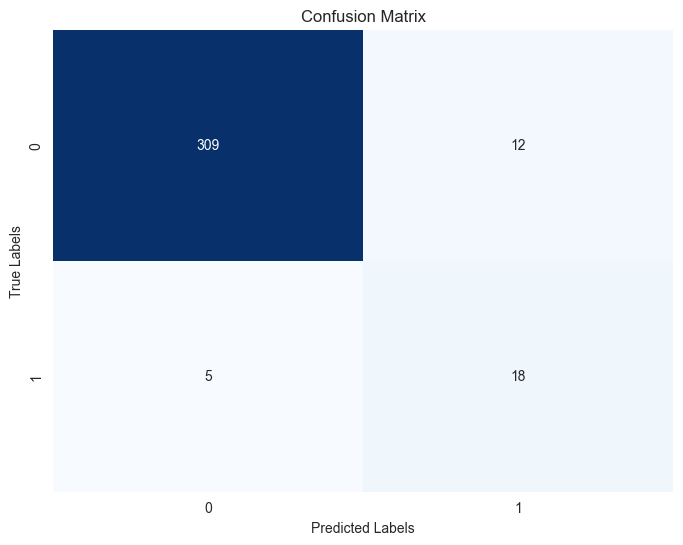

In [10]:
confusion_matrix_heatmap(y_test, y_pred)

In [11]:
DT.fit(X_train[GRMIFeatures], y_train)

y_pred = DT.predict(X_test[GRMIFeatures])

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))
add_result("Random Forest", "Mutual Information", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred))

Accuracy: 0.9651162790697675
Precision: 0.7894736842105263
Recall: 0.6521739130434783
F1: 0.7142857142857143
AUC: 0.8198564269267236


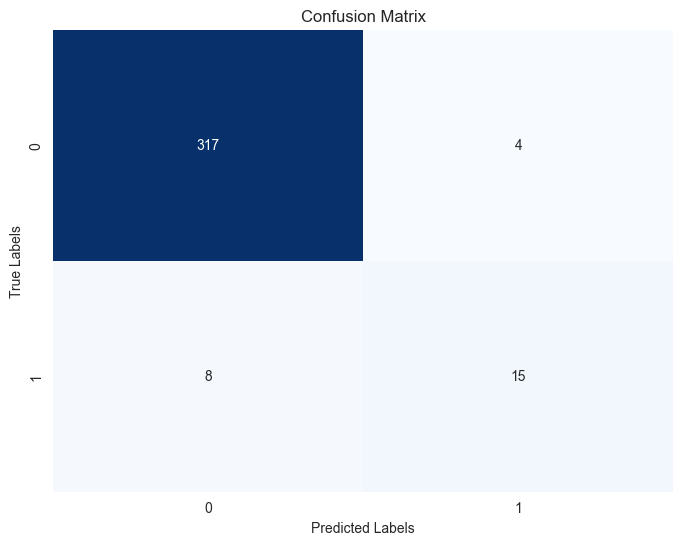

In [12]:
confusion_matrix_heatmap(y_test, y_pred)

# Genetic with Chi2

In [13]:
best_solution, best_Gfitness = genetic_algorithm(X, y, mutation_rate=mutation, crossover_rate=crossover,fitness_function=chi2_eval, generations=800)


GRX2Features = X.columns[best_solution.astype(bool)].tolist()

Generation 1/800
Generation 2/800
Generation 3/800
Generation 4/800
Generation 5/800
Generation 6/800
Generation 7/800
Generation 8/800
Generation 9/800
Generation 10/800
Generation 11/800
Generation 12/800
Generation 13/800
Generation 14/800
Generation 15/800
Generation 16/800
Generation 17/800
Generation 18/800
Generation 19/800
Generation 20/800
Generation 21/800
Generation 22/800
Generation 23/800
Generation 24/800
Generation 25/800
Generation 26/800
Generation 27/800
Generation 28/800
Generation 29/800
Generation 30/800
Generation 31/800
Generation 32/800
Generation 33/800
Generation 34/800
Generation 35/800
Generation 36/800
Generation 37/800
Generation 38/800
Generation 39/800
Generation 40/800
Generation 41/800
Generation 42/800
Generation 43/800
Generation 44/800
Generation 45/800
Generation 46/800
Generation 47/800
Generation 48/800
Generation 49/800
Generation 50/800
Generation 51/800
Generation 52/800
Generation 53/800
Generation 54/800
Generation 55/800
Generation 56/800
G

In [14]:
NB.fit(X_train[GRX2Features], y_train)
y_pred = NB.predict(X_test[GRX2Features])

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))
add_result("Naive Bayes", "X2", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred))

Accuracy: 0.9534883720930233
Precision: 0.6206896551724138
Recall: 0.782608695652174
F1: 0.6923076923076923
AUC: 0.8741703914397941


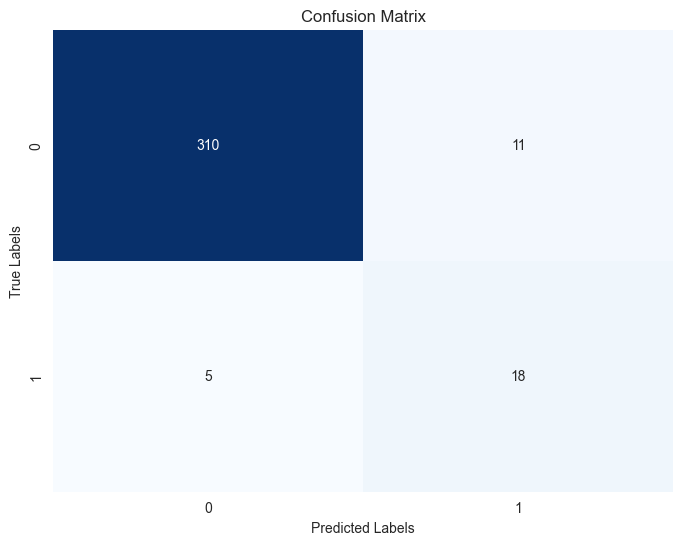

In [15]:
confusion_matrix_heatmap(y_test, y_pred)

In [16]:
DT.fit(X_train[GRX2Features], y_train)
y_pred = DT.predict(X_test[GRX2Features])

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))
add_result("Random Forest", "X2", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred))

Accuracy: 0.9709302325581395
Precision: 0.8421052631578947
Recall: 0.6956521739130435
F1: 0.761904761904762
AUC: 0.8431531897602601


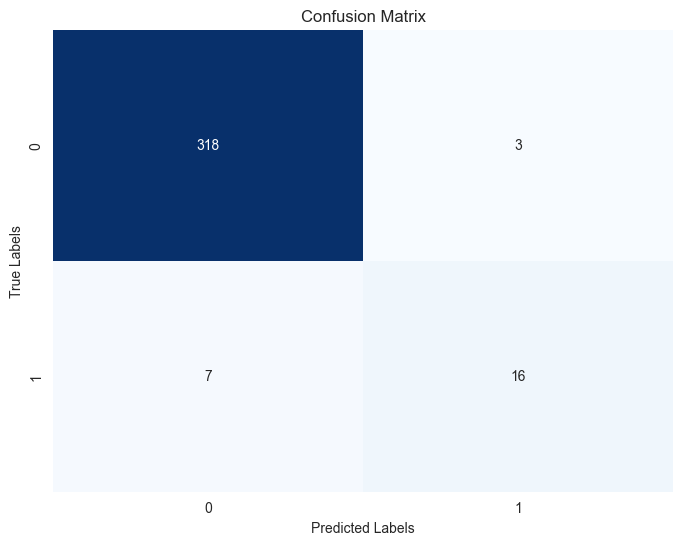

In [17]:
confusion_matrix_heatmap(y_test, y_pred)

# Genetic with ReliefF

In [18]:
best_solution, best_Gfitness = genetic_algorithm(X, y, mutation_rate=mutation, crossover_rate=crossover,fitness_function=relieff_eval, generations=800)


GRRFFeatures = X.columns[best_solution.astype(bool)].tolist()

Generation 1/800
Generation 2/800
Generation 3/800
Generation 4/800
Generation 5/800
Generation 6/800
Generation 7/800
Generation 8/800
Generation 9/800
Generation 10/800
Generation 11/800
Generation 12/800
Generation 13/800
Generation 14/800
Generation 15/800
Generation 16/800
Generation 17/800
Generation 18/800
Generation 19/800
Generation 20/800
Generation 21/800
Generation 22/800
Generation 23/800
Generation 24/800
Generation 25/800
Generation 26/800
Generation 27/800
Generation 28/800
Generation 29/800
Generation 30/800
Generation 31/800
Generation 32/800
Generation 33/800
Generation 34/800
Generation 35/800
Generation 36/800
Generation 37/800
Generation 38/800
Generation 39/800
Generation 40/800
Generation 41/800
Generation 42/800
Generation 43/800
Generation 44/800
Generation 45/800
Generation 46/800
Generation 47/800
Generation 48/800
Generation 49/800
Generation 50/800
Generation 51/800
Generation 52/800
Generation 53/800
Generation 54/800
Generation 55/800
Generation 56/800
G

In [19]:
NB.fit(X_train[GRRFFeatures], y_train)
y_pred = NB.predict(X_test[GRRFFeatures])

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))
add_result("Naive Bayes", "Relief", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred))

Accuracy: 0.938953488372093
Precision: 0.5294117647058824
Recall: 0.782608695652174
F1: 0.631578947368421
AUC: 0.8663822294460246


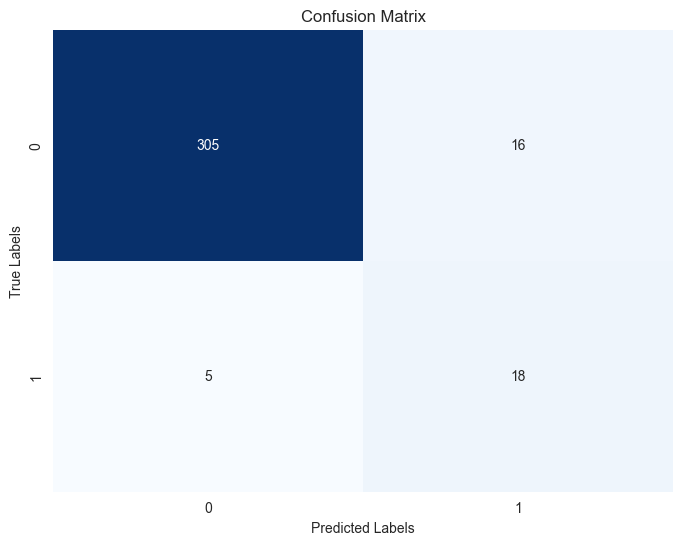

In [20]:
confusion_matrix_heatmap(y_test, y_pred)

In [21]:
DT.fit(X_train[GRRFFeatures], y_train)
y_pred = DT.predict(X_test[GRRFFeatures])

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred))
add_result("Random Forest", "Relief", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred))

Accuracy: 0.9593023255813954
Precision: 0.6956521739130435
Recall: 0.6956521739130435
F1: 0.6956521739130435
AUC: 0.8369226601652445


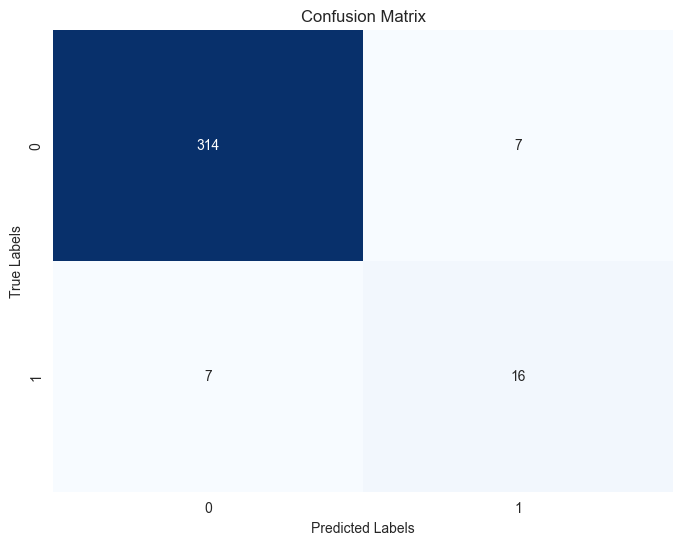

In [22]:
confusion_matrix_heatmap(y_test, y_pred)

## Red Neuronal


In [23]:
print("Features selected by MI: ", len(GRMIFeatures))
print("Features selected by X2: ", len(GRX2Features))
print("Features selected by ReliefF: ", len(GRRFFeatures))

Features selected by MI:  54
Features selected by X2:  34
Features selected by ReliefF:  31


In [24]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy

MUTUAL_INFORMATION 

In [25]:

RN = Sequential()

input_dim = X_train[GRMIFeatures].shape[1]
RN.add(Dense(units=64, activation='relu', input_dim=input_dim))
RN.add(Dense(units=32, activation='relu'))
RN.add(Dense(units=1, activation='sigmoid'))
RN.compile(optimizer=Adam(learning_rate=0.001),
           loss=BinaryCrossentropy(),
           metrics=['accuracy'])

history = RN.fit(X_train[GRMIFeatures], y_train, epochs=100, batch_size=32, validation_split=0.2)

loss, accuracy = RN.evaluate(X_test[GRMIFeatures], y_test)

print(f'Test Accuracy: {accuracy}')
y_pred_prob = RN.predict(X_test[GRMIFeatures])
y_pred = (y_pred_prob > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred_prob))
add_result("Neural Network", "Mutual Information", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred_prob))


Epoch 1/100


C:\Users\Randall\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


20/20 [==============================] - 0s 7ms/step - loss: 0.4288 - accuracy: 0.8984 - val_loss: 0.2876 - val_accuracy: 0.9193
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2958 - accuracy: 0.8984 - val_loss: 0.2361 - val_accuracy: 0.9193
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2301 - accuracy: 0.9000 - val_loss: 0.1949 - val_accuracy: 0.9193
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1783 - accuracy: 0.9234 - val_loss: 0.1556 - val_accuracy: 0.9317
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1370 - accuracy: 0.9422 - val_loss: 0.1309 - val_accuracy: 0.9441
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1152 - accuracy: 0.9563 - val_loss: 0.1154 - val_accuracy: 0.9503
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1075 - accuracy: 0.9516 - val_loss: 0.1079 - val_accuracy: 0.9627
Epoch 8/100
20/20 [======

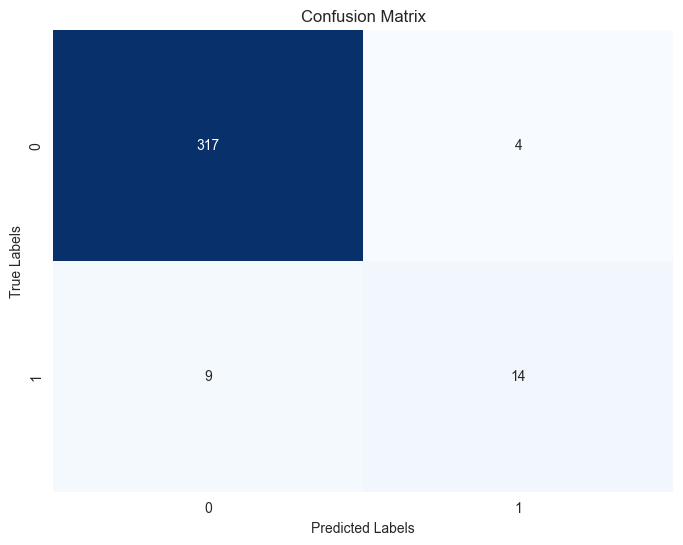

In [26]:
confusion_matrix_heatmap(y_test, y_pred)

CHI2

In [27]:

RN = Sequential()

input_dim = X_train[GRX2Features].shape[1]
RN.add(Dense(units=64, activation='relu', input_dim=input_dim))
RN.add(Dense(units=32, activation='relu'))
RN.add(Dense(units=1, activation='sigmoid'))
RN.compile(optimizer=Adam(learning_rate=0.001),
           loss=BinaryCrossentropy(),
           metrics=['accuracy'])

history = RN.fit(X_train[GRX2Features], y_train, epochs=100, batch_size=32, validation_split=0.2)

loss, accuracy = RN.evaluate(X_test[GRX2Features], y_test)

print(f'Test Accuracy: {accuracy}')
y_pred_prob = RN.predict(X_test[GRX2Features])
y_pred = (y_pred_prob > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred_prob))
add_result("Neural Network", "X2", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred_prob))

Epoch 1/100


C:\Users\Randall\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


20/20 [==============================] - 0s 6ms/step - loss: 0.5197 - accuracy: 0.8172 - val_loss: 0.3363 - val_accuracy: 0.9193
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3107 - accuracy: 0.8984 - val_loss: 0.2499 - val_accuracy: 0.9193
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2568 - accuracy: 0.8984 - val_loss: 0.2120 - val_accuracy: 0.9193
Epoch 4/100
20/20 [==============================] - 0s 1ms/step - loss: 0.2024 - accuracy: 0.9109 - val_loss: 0.1733 - val_accuracy: 0.9317
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1554 - accuracy: 0.9375 - val_loss: 0.1405 - val_accuracy: 0.9379
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1239 - accuracy: 0.9516 - val_loss: 0.1254 - val_accuracy: 0.9317
Epoch 7/100
20/20 [==============================] - 0s 1ms/step - loss: 0.1093 - accuracy: 0.9578 - val_loss: 0.1154 - val_accuracy: 0.9379
Epoch 8/100
20/20 [======

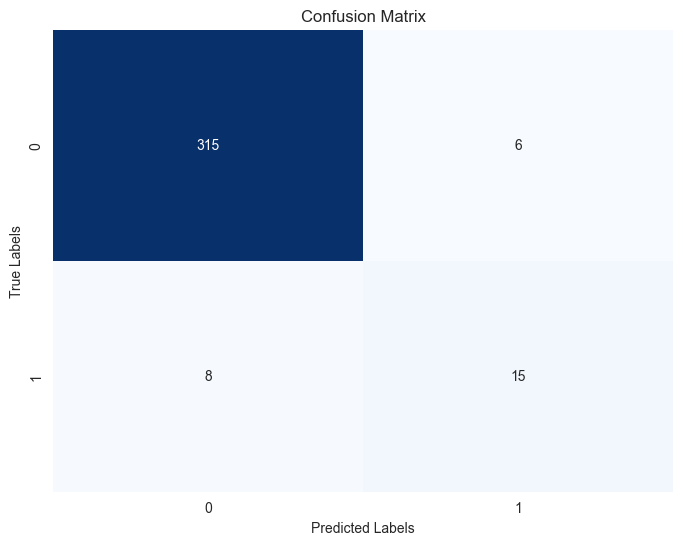

In [28]:
confusion_matrix_heatmap(y_test, y_pred)

RELIEFF

In [29]:
RN = Sequential()

input_dim = X_train[GRRFFeatures].shape[1]
RN.add(Dense(units=64, activation='relu', input_dim=input_dim))
RN.add(Dense(units=32, activation='relu'))
RN.add(Dense(units=1, activation='sigmoid'))
RN.compile(optimizer=Adam(learning_rate=0.001),
           loss=BinaryCrossentropy(),
           metrics=['accuracy'])

history = RN.fit(X_train[GRRFFeatures], y_train, epochs=100, batch_size=32, validation_split=0.2)

loss, accuracy = RN.evaluate(X_test[GRRFFeatures], y_test)

print(f'Test Accuracy: {accuracy}')
y_pred_prob = RN.predict(X_test[GRRFFeatures])
y_pred = (y_pred_prob > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred_prob)) 
add_result("Neural Network", "Relief", accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred), roc_auc_score(y_test, y_pred_prob))

Epoch 1/100


C:\Users\Randall\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


20/20 [==============================] - 0s 5ms/step - loss: 0.4897 - accuracy: 0.8969 - val_loss: 0.3423 - val_accuracy: 0.9193
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3328 - accuracy: 0.8984 - val_loss: 0.2771 - val_accuracy: 0.9193
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2875 - accuracy: 0.8984 - val_loss: 0.2506 - val_accuracy: 0.9193
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2371 - accuracy: 0.9016 - val_loss: 0.2122 - val_accuracy: 0.9193
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1892 - accuracy: 0.9219 - val_loss: 0.1791 - val_accuracy: 0.9317
Epoch 6/100
20/20 [==============================] - 0s 1ms/step - loss: 0.1499 - accuracy: 0.9375 - val_loss: 0.1567 - val_accuracy: 0.9379
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.1236 - accuracy: 0.9500 - val_loss: 0.1419 - val_accuracy: 0.9503
Epoch 8/100
20/20 [======

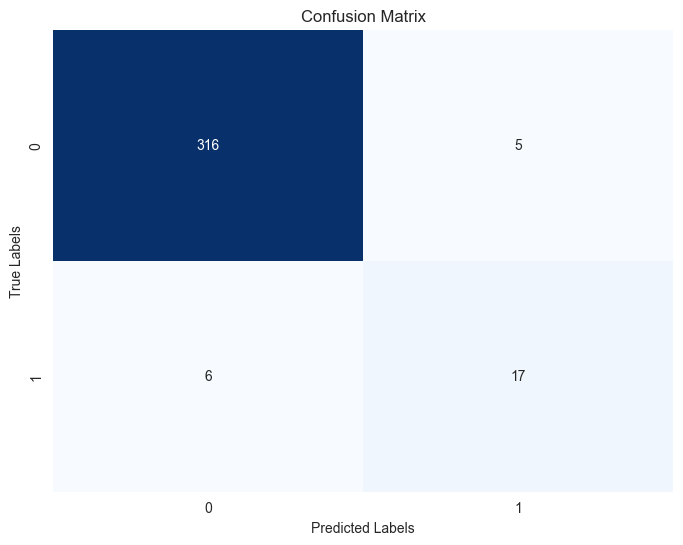

In [30]:
confusion_matrix_heatmap(y_test, y_pred)

In [31]:
display_tables()

,Accuracy,Precision,Recall,F1 Score,AUC
Mutual Information,0.950581,0.6,0.782609,0.679245,0.872613
X2,0.953488,0.62069,0.782609,0.692308,0.87417
Relief,0.938953,0.529412,0.782609,0.631579,0.866382


Random Forest Results


,Accuracy,Precision,Recall,F1 Score,AUC
Mutual Information,0.965116,0.789474,0.652174,0.714286,0.819856
X2,0.97093,0.842105,0.695652,0.761905,0.843153
Relief,0.959302,0.695652,0.695652,0.695652,0.836923


Neural Network Results


,Accuracy,Precision,Recall,F1 Score,AUC
Mutual Information,0.962209,0.777778,0.608696,0.682927,0.966409
X2,0.959302,0.714286,0.652174,0.681818,0.978329
Relief,0.968023,0.772727,0.73913,0.755556,0.973046
